# Task 3

1. Provide a design strategy for the delivery of the required amount of water from the river to the filtration unit.
2. Evaluate the **velocity** of the water through both pipes for each of the selected *diameters*.
3. Evaluate the **pump** head and **power** required for the *average daily flow* and the *peak flow* including *major* and *minor losses* using the selected pair of *diameters*.
4. Plot the **hydraulic grade line (HGL)** and the **energy line (EL)** along the *length* of the pipe at the *13 locations* for the chosen set of *diameters*.
5. Choose **pump type**, evaluate the **number of pumps** needed, and calulate the **capital cost** of the pumps.
6. Calculate the **capital cost** and the **operating cost** for each pair of *diameters*, evaluate wich of the pairs is **optimum**.

In [69]:
import numpy as np
import fluids
import pandas as pd
import matplotlib.pyplot as plt
from scipy.constants import g

Given Parameters


| Location | Distance (m) | Elevation (m) | Type of fittings | Material | Note |
|---|---|---|---|---|---|
|  0 |  0 | 630 | 2 Elbows, 1 Gate Valve | HDPE | Source
|  1 | 10 | 637 | 1 Reducer, 1 Expander | HDPE
|  2 | 13 | 638 | 4 Elbows | Carbon Steel
|  3 | 15 | 639 || Carbon Steel
|  4 | 19 | 640 | 4 Elbows | Carbon Steel
|  5 | 22 | 641 || Carbon Steel
|  6 | 26 | 642 | 2 Elbows | Carbon Steel
|  7 | 32 | 643 || Carbon Steel
|  8 | 35 | 644 || Carbon Steel
|  9 | 39 | 645 || Carbon Steel
| 10 | 42 | 646 | 4 Elbows | HDPE
| 11 | 45 | 650 | 1 Reducer | HDPE | WTP Entry
| 12 | 45 to 55 | 651 | 8 Elbows, 3 Gate Valves | HDPE | LF
| 13 | 55 to 67 | 657 | 8 Elbows, 2 Gate Valves | HDPE | MF

- Average daily flow rate : 60 L/s
- Peak  flow rate: 180 L/s
- LF pipe length: 10 m
- MF pipe length: 12 m

In [70]:
# Given Data in base SI units
K_L = {'Elbow': 0.39, 'Gate Valve': 0.1, 'Reducer': 0.51, 'Expander': 0.62}

# Surface roughness in m
epsilon = {'HDPE': 1.5e-05, 'Carbon Steel': 1.5e-04}

# Information about pipeline
pipeline = pd.DataFrame(
    {
        'Distance (m)': np.array([0, 10, 13, 15, 19, 22, 26, 32, 35, 39, 42, 45, 55, 67]),
        'Elevation (m)': np.array([630, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 650, 651, 658]),
        'Sum of Loss Coefficients': np.array([
            2*K_L['Elbow']+K_L['Gate Valve'], 
            K_L['Reducer']+K_L['Expander'],
            4*K_L['Elbow'],
            0,
            4*K_L['Elbow'],
            0,
            2*K_L['Elbow'],
            0,
            0,
            0,
            4*K_L['Elbow'],
            K_L['Reducer'],
            8*K_L['Elbow']+3*K_L['Gate Valve'],
            8*K_L['Elbow']+2*K_L['Gate Valve']
            ]),
        'material': np.array(['HDPE' for _ in range(2)]
                                        + ['Carbon Steel' for _ in range(9)]
                                        + ['HDPE' for _ in range(3)]),
        'Surface Roughness (m)': np.array([epsilon['HDPE'] for _ in range(2)]
                                        + [epsilon['Carbon Steel'] for _ in range(9)]
                                        + [epsilon['HDPE'] for _ in range(3)]),
        'Section': np.array(['RW' for _ in range(12)]+['WTP' for _ in range(2)])
    }
)

pipeline['Length (m)'] = np.array([0]+[pipeline.iloc[i, 0] - pipeline.iloc[i-1, 0] for i in range(1, len(pipeline.iloc[:,0]))])
pipeline['Relative elevation (m)'] = pipeline['Elevation (m)'] - pipeline['Elevation (m)'][0]

# Flow rates in m^3/s
avg_flow_rate = 60/1000
peak_flow_rate = 180/1000

def velocity(flow_rate, diameter):
    '''
    flow_rate : float
        Flow rate in m^3/s
    diameter : float
        Diameter of pipe in meters
    '''
    return 4 * flow_rate / (np.pi * diameter**2)

def Re(velocity, diameter):
    '''
    velocity : float
        Velocity in m/s
    diameter : float
        Diameter of pipe in meters
    '''
    return fluids.Reynolds(velocity, diameter, 1000, 1.787e-03)

def pump_head(z1, v1, z2, v2, h_l):
    '''
    Assuming the initial and final pressures are 1 atm.
    '''
    return (z2-z1) + (v2**2 - v1**2) / (2*g) + h_l

def egl(z, v, h_l):
    '''
    Head loss accounts for the pressure drop
    '''
    return z + v**2 / (2*g) - h_l

def hgl(z, h_l):
    '''
    Head loss accounts for the pressure drop
    '''
    return z - h_l

def hdpe_cost(diameter, length):

    return 280 * length * diameter**2 

def carbonsteel_cost(diameter, length):

    return 175 * length * diameter ** 2

In [71]:
pipeline

,Distance (m),Elevation (m),Sum of Loss Coefficients,material,Surface Roughness (m),Section,Length (m),Relative elevation (m)
0,0,630,0.88,HDPE,0.000015,RW,0,0
1,10,637,1.13,HDPE,0.000015,RW,10,7
2,13,638,1.56,Carbon Steel,0.000150,RW,3,8
3,15,639,0.00,Carbon Steel,0.000150,RW,2,9
4,19,640,1.56,Carbon Steel,0.000150,RW,4,10
5,22,641,0.00,Carbon Steel,0.000150,RW,3,11
6,26,642,0.78,Carbon Steel,0.000150,RW,4,12
7,32,643,0.00,Carbon Steel,0.000150,RW,6,13
8,35,644,0.00,Carbon Steel,0.000150,RW,3,14
9,39,645,0.00,Carbon Steel,0.000150,RW,4,15


In [72]:
average = pd.DataFrame({'D_RW (m)': np.arange(350, 476, 25)/1000, 'D_WTP (m)':np.arange(150, 276, 25)/1000})

peak = average.copy()

average['v_RW (m/s)'] = velocity(avg_flow_rate, average['D_RW (m)'])
peak['v_RW (m/s)'] = velocity(peak_flow_rate, peak['D_RW (m)'])

average['v_WTP (m/s)'] = velocity(avg_flow_rate, average['D_WTP (m)'])
peak['v_WTP (m/s)'] = velocity(peak_flow_rate, peak['D_WTP (m)'])

average['Re_RW'] = Re(average['v_RW (m/s)'], average['D_RW (m)'])
peak['Re_RW'] = Re(peak['v_RW (m/s)'], peak['D_RW (m)'])

average['Re_WTP'] = Re(average['v_WTP (m/s)'], average['D_WTP (m)'])
peak['Re_WTP'] = Re(peak['v_WTP (m/s)'], peak['D_WTP (m)'])

Bernoulli Equation with losses

$$ \frac{P_0}{\rho g} + \frac{v_{0}^2}{2g} + z_0 + h_{pump} = \frac{P_{13}}{\rho g} + \frac{v_{13}^2}{2g} + z_{13} + h_L $$

Losses

$$ h_{L,total} = h_{L,major} + h_{L,minor} = \sum_{i} f_i \frac{L_i}{D_i} \frac{v_i^2}{2g} + \sum_{j} K_{L,j} \frac{v_j^2}{2g} $$

In [73]:
for flow_rate in (average, peak):
    for i in range(len(pipeline)):

        h_loss = []

        for j in range(len(flow_rate)):
        
            major = (
                fluids.Churchill_1977(
                flow_rate['Re_{}'.format(pipeline['Section'][i])][j],
                pipeline['Surface Roughness (m)'][i]/flow_rate['D_{} (m)'.format(pipeline['Section'][i])][j])
                * pipeline['Length (m)'][i] * flow_rate['v_{} (m/s)'.format(pipeline['Section'][i])][j]**2
                / (flow_rate['D_{} (m)'.format(pipeline['Section'][i])][j] * 2*g)
            )

            minor = (
                pipeline['Sum of Loss Coefficients'][i]
                * flow_rate['v_{} (m/s)'.format(pipeline['Section'][i])][j]**2
                / (2*g) 
            )

            h_loss.append(major+minor)
        
        flow_rate['Location {} h_L (m)'.format(i)] = h_loss

    flow_rate['Total h_L (m)'] = sum([flow_rate['Location {} h_L (m)'.format(k)] for k in range(14)])

    flow_rate['h_pump (m)'] = pump_head(pipeline['Elevation (m)'][0], flow_rate['v_RW (m/s)'],
                                    pipeline['Elevation (m)'][13], flow_rate['v_WTP (m/s)'],
                                    flow_rate['Total h_L (m)'])


average['Water hp (hp)'] = 1000 * g * avg_flow_rate * average['h_pump (m)'] / 745.7
peak['Water hp (hp)'] = 1000 * g * peak_flow_rate * peak['h_pump (m)'] / 745.7

## Grade Lines
HGL and EGL

In [74]:
for flow_rate in (average, peak):

    for i in range(len(pipeline)):

        flow_rate['Location {} HGL (m)'.format(i)] = hgl(pipeline['Relative elevation (m)'][i], flow_rate['Location {} h_L (m)'.format(i)])
        
        flow_rate['Location {} EGL (m)'.format(i)] = egl(pipeline['Relative elevation (m)'][i], flow_rate['v_{} (m/s)'.format(pipeline['Section'][i])], flow_rate['Location {} h_L (m)'.format(i)])

In [75]:
grade_lines = []
for i in range(len(average)):

    grade_lines.append(
        pd.DataFrame(
            {
                'Avg_HGL' : np.array([average['Location {} HGL (m)'.format(j)][i] for j in range(14)]), 
                'Avg_EGL' : np.array([average['Location {} EGL (m)'.format(j)][i] for j in range(14)]),
                'Peak_HGL' : np.array([peak['Location {} HGL (m)'.format(j)][i] for j in range(14)]),
                'Peak_EGL' : np.array([peak['Location {} EGL (m)'.format(j)][i] for j in range(14)]),
            }, index=pd.Index(np.arange(14), name='Location')
        )
    )

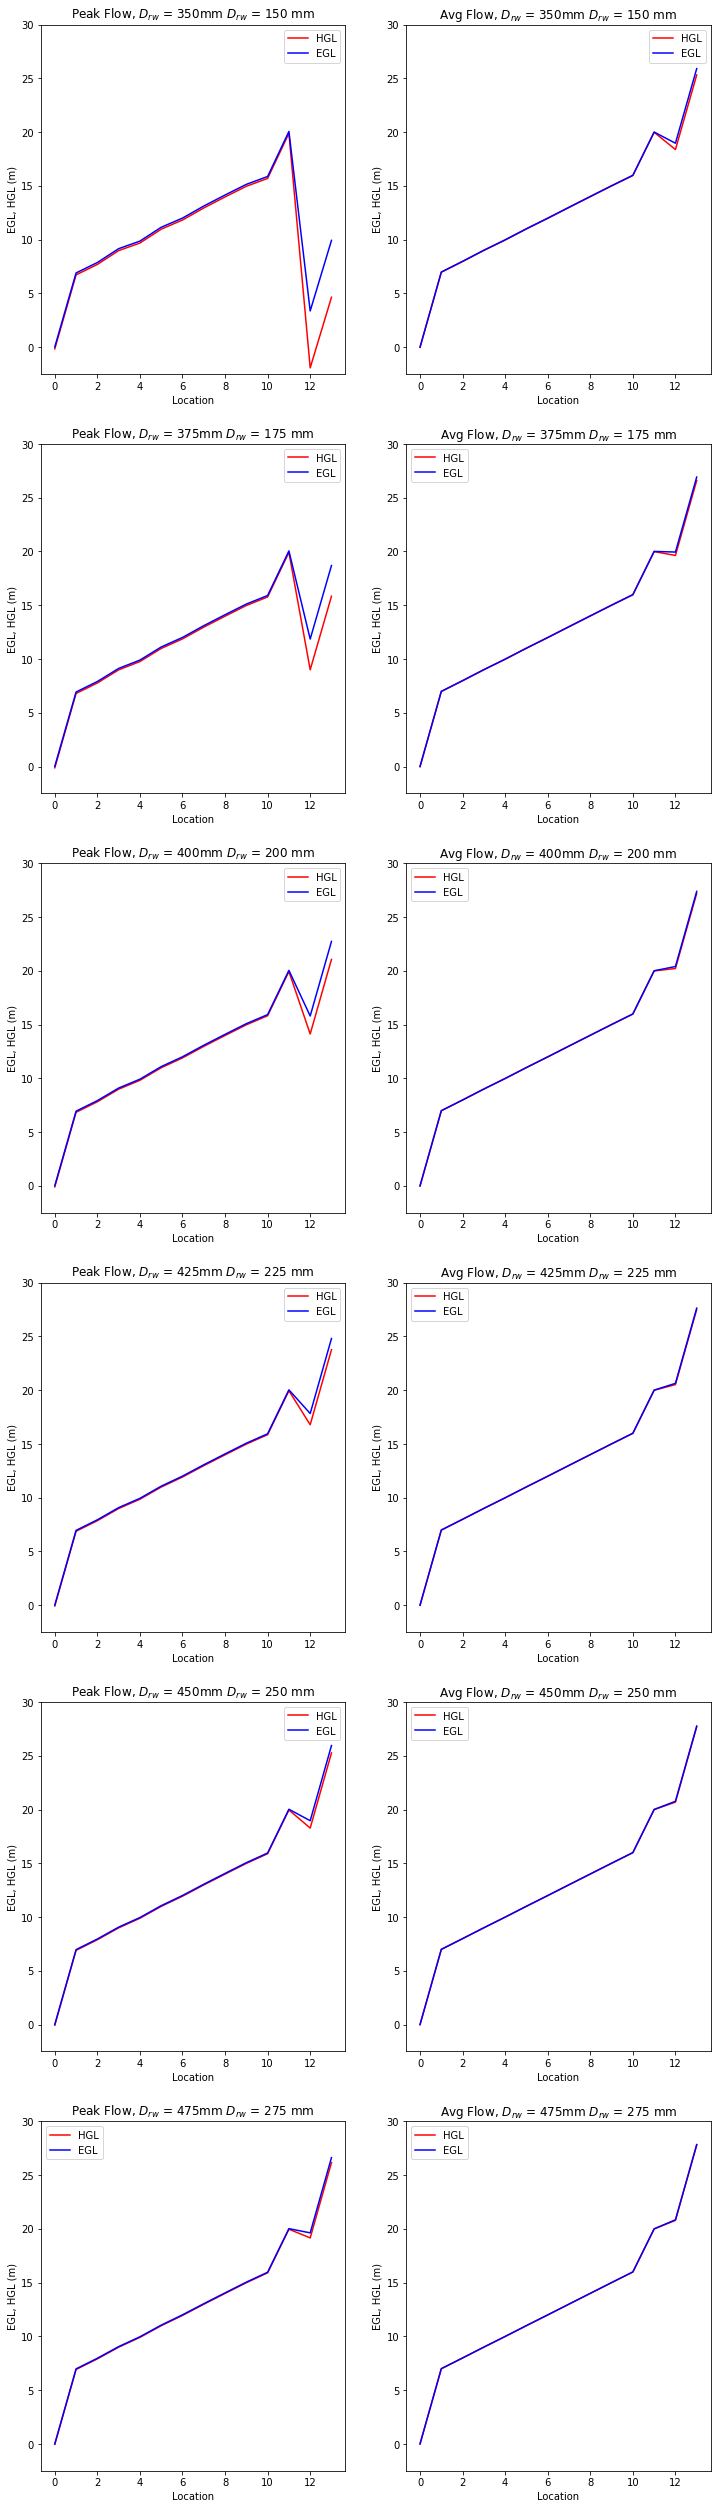

In [76]:
fig1, axs = plt.subplots(6, 2, figsize=(12,45))

for i in range(6):
    for j in range(2):

        if j: name = 'Avg'
        else: name = 'Peak'

        axs[i, j].plot(grade_lines[i][name+'_HGL'], 'r', label='HGL')
        axs[i, j].plot(grade_lines[i][name+'_EGL'], 'b', label='EGL')

        axs[i, j].set_ylim(-2.5, 30)

        axs[i, j].set_title(name + ' Flow, ' + r'$D_{rw}$ = ' + str(int(average['D_RW (m)'][i]*1000)) + r'mm $D_{rw}$ = ' + str(int(average['D_WTP (m)'][i]*1000)) + ' mm')
        axs[i, j].set_xlabel('Location')
        axs[i, j].set_ylabel('EGL, HGL (m)')

        axs[i, j].legend()

## Cost Calculations

In [86]:
for flow_rate in (average, peak):

    flow_rate['Pipe cost'] = np.zeros(len(flow_rate))

    for i in range(len(pipeline)):
        
        if pipeline['material'][i] == 'HDPE': cost_func = hdpe_cost
        else: cost_func = carbonsteel_cost
        
        flow_rate['Pipe cost'] += cost_func(flow_rate['D_{} (m)'.format(pipeline['Section'][i])], pipeline['Length (m)'][i])


In [92]:
peak

,D_RW (m),D_WTP (m),v_RW (m/s),v_WTP (m/s),Re_RW,Re_WTP,Location 0 h_L (m),Location 1 h_L (m),Location 2 h_L (m),Location 3 h_L (m),...,Location 9 EGL (m),Location 10 HGL (m),Location 10 EGL (m),Location 11 HGL (m),Location 11 EGL (m),Location 12 HGL (m),Location 12 EGL (m),Location 13 HGL (m),Location 13 EGL (m),Pipe cost
0,0.350,0.150,1.870883,10.185916,366429.159889,855001.373073,0.157045,0.275084,0.305390,0.017995,...,15.142471,15.694610,15.873070,19.886958,20.065419,-1.920713,3.369212,4.642446,9.932371,1270.500
1,0.375,0.175,1.629747,7.483530,342000.549229,732858.319777,0.119171,0.205476,0.230270,0.012674,...,15.110074,15.769730,15.905152,19.915200,20.050622,8.999725,11.855095,15.838280,18.693650,1488.025
2,0.400,0.200,1.432394,5.729578,320625.514903,641251.029805,0.092057,0.156516,0.176900,0.009139,...,15.086333,15.823100,15.927710,19.935157,20.039767,14.125165,15.798930,21.062430,22.736195,1724.800
3,0.425,0.225,1.268834,4.527074,301765.190496,570000.915382,0.072234,0.121282,0.138141,0.006727,...,15.068631,15.861859,15.943943,19.949579,20.031663,16.784156,17.829080,23.760208,24.805131,1980.825
4,0.450,0.250,1.131768,3.666930,285000.457691,513000.823844,0.057471,0.095409,0.109443,0.005042,...,15.055223,15.890557,15.955864,19.960210,20.025517,18.273410,18.958985,25.265582,25.951157,2256.100
5,0.475,0.275,1.015770,3.030521,270000.433602,466364.385313,0.046294,0.076070,0.087828,0.003841,...,15.044924,15.912172,15.964778,19.968183,20.020790,19.159537,19.627794,26.158558,26.626814,2550.625


In [91]:
average

,D_RW (m),D_WTP (m),v_RW (m/s),v_WTP (m/s),Re_RW,Re_WTP,Location 0 h_L (m),Location 1 h_L (m),Location 2 h_L (m),Location 3 h_L (m),...,Location 9 EGL (m),Location 10 HGL (m),Location 10 EGL (m),Location 11 HGL (m),Location 11 EGL (m),Location 12 HGL (m),Location 12 EGL (m),Location 13 HGL (m),Location 13 EGL (m),Pipe cost
0,0.350,0.150,0.623628,3.395305,122143.053296,285000.457691,0.017449,0.032287,0.034263,0.002220,...,15.015390,15.965737,15.985566,19.986923,20.006752,18.380381,18.968151,25.317269,25.905038,1270.500
1,0.375,0.175,0.543249,2.494510,114000.183076,244286.106592,0.013241,0.024087,0.025836,0.001575,...,15.011897,15.974164,15.989211,19.990201,20.005248,19.628901,19.946164,26.603415,26.920679,1488.025
2,0.400,0.200,0.477465,1.909859,106875.171634,213750.343268,0.010229,0.018326,0.019848,0.001144,...,15.009336,15.980152,15.991776,19.992515,20.004138,20.215000,20.400974,27.203804,27.389777,1724.800
3,0.425,0.225,0.422945,1.509025,100588.396832,190000.305127,0.008026,0.014183,0.015499,0.000847,...,15.007426,15.984501,15.993622,19.994185,20.003306,20.518990,20.635093,27.513813,27.629915,1980.825
4,0.450,0.250,0.377256,1.222310,95000.152564,171000.274615,0.006386,0.011145,0.012279,0.000639,...,15.005978,15.987721,15.994978,19.995416,20.002672,20.689169,20.765344,27.686724,27.762899,2256.100
5,0.475,0.275,0.338590,1.010174,90000.144534,155454.795104,0.005144,0.008876,0.009853,0.000490,...,15.004866,15.990147,15.995992,19.996338,20.002183,20.790366,20.842395,27.789230,27.841258,2550.625
